In [32]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
df=pd.read_csv("TASK-ML-INTERN.csv")

In [34]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [35]:
df.shape

(500, 450)

In [36]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [37]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
None


In [38]:
df.isnull().sum()

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

In [39]:
df["hsi_id"] = df["hsi_id"].str.extract("(\d+)").astype(float).astype("Int64")


In [40]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [41]:
# Separate features and target
X = df.iloc[:, :-1].values  # All columns except last
y = df.iloc[:, -1].values   # Last column (target variable)

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
df

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


Optimal number of components: 4


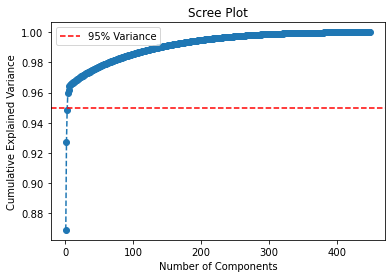

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply PCA
pca = PCA().fit(X_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)  # Cumulative variance

# Find the number of components that explain ~95% variance
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components: {n_components}")

# Step 2: Scree Plot (Elbow Method)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.legend()
plt.show()


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


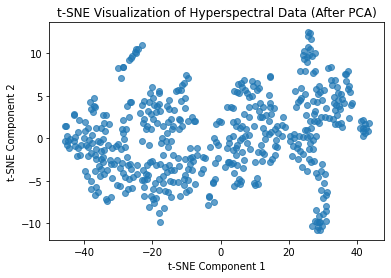

In [45]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Reduce dimensions to 32 using PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Apply t-SNE (max 2 or 3 components for visualization)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Visualize the t-SNE output
import matplotlib.pyplot as plt
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Hyperspectral Data (After PCA)")
plt.show()


In [46]:
from sklearn.model_selection import train_test_split

# Assuming `X_pca` is the PCA-reduced dataset and `y` is the target (DON concentration)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (400, 4), Testing Set: (100, 4)


Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Results:\nMAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")


Random Forest Results:
MAE: 1900.474, RMSE: 4003.175, R²: 0.943


In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (1 neuron for regression)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the Model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Evaluate Model
y_pred_nn = model.predict(X_test).flatten()

# Calculate Metrics
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network Results:\nMAE: {mae_nn:.3f}, RMSE: {rmse_nn:.3f}, R²: {r2_nn:.3f}")


Epoch 1/100
25/25 [==============================] - 1s 18ms/step - loss: 153690640.0000 - mae: 3156.3408 - val_loss: 298894880.0000 - val_mae: 4407.4224
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 153647776.0000 - mae: 3152.1726 - val_loss: 298813504.0000 - val_mae: 4402.6992
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 153584912.0000 - mae: 3147.0369 - val_loss: 298707840.0000 - val_mae: 4396.4668
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 153497344.0000 - mae: 3139.6270 - val_loss: 298522368.0000 - val_mae: 4386.1470
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 153363792.0000 - mae: 3128.4807 - val_loss: 298244128.0000 - val_mae: 4372.0142
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 153158160.0000 - mae: 3114.6284 - val_loss: 297884416.0000 - val_mae: 4354.7168
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 15291320

LSTM

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reshape data: Convert (samples, features) → (samples, timesteps, features)
n_timesteps = X_pca.shape[1]  
X_lstm = X_pca.reshape((X_pca.shape[0], n_timesteps, 1))  # Reshaping for LSTM

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")  # Should be (samples, timesteps, features)


Train Shape: (400, 4, 1), Test Shape: (100, 4, 1)


In [50]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Define the hypermodel function
def build_model(hp):
    model = Sequential([
        LSTM(units=hp.Choice('lstm_units_1', [32, 64, 128]), 
             return_sequences=True, 
             input_shape=(X_train.shape[1], X_train.shape[2])),
        BatchNormalization(),
        Dropout(hp.Choice('dropout_1', [0.2, 0.3, 0.4])),

        LSTM(units=hp.Choice('lstm_units_2', [32, 64, 128]), return_sequences=False),
        BatchNormalization(),
        Dropout(hp.Choice('dropout_2', [0.2, 0.3, 0.4])),

        Dense(hp.Choice('dense_units', [32, 64, 128]), activation='relu'),
        Dropout(hp.Choice('dropout_3', [0.2, 0.3, 0.4])),

        Dense(1)  # Regression output
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('lr', [0.001, 0.0005, 0.0001])),
                  loss='mse', metrics=['mae'])
    return model

# Hyperparameter tuning
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuning_results',
    project_name='lstm_hyperopt'
)

# Run the search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Get best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Evaluate performance
y_pred_best = best_model.predict(X_test).flatten()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print(f"Optimized LSTM Performance:\nMAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")


Reloading Tuner from tuning_results\lstm_hyperopt\tuner0.json
Best Hyperparameters: {'lstm_units_1': 128, 'dropout_1': 0.3, 'lstm_units_2': 64, 'dropout_2': 0.2, 'dense_units': 128, 'dropout_3': 0.4, 'lr': 0.001}
Epoch 1/100
13/13 [==============================] - 9s 146ms/step - loss: 153716752.0000 - mae: 3158.0796 - val_loss: 299003232.0000 - val_mae: 4412.6968
Epoch 2/100
13/13 [==============================] - 0s 23ms/step - loss: 153700672.0000 - mae: 3156.7068 - val_loss: 298997792.0000 - val_mae: 4412.3740
Epoch 3/100
13/13 [==============================] - 0s 23ms/step - loss: 153679952.0000 - mae: 3155.5012 - val_loss: 298989536.0000 - val_mae: 4411.9692
Epoch 4/100
13/13 [==============================] - 0s 25ms/step - loss: 153639616.0000 - mae: 3153.7188 - val_loss: 298976896.0000 - val_mae: 4411.3755
Epoch 5/100
13/13 [==============================] - 0s 23ms/step - loss: 153588304.0000 - mae: 3152.5332 - val_loss: 298965184.0000 - val_mae: 4411.2310
Epoch 6/100
13/1

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reshape data for CNN
X_cnn = X_pca.reshape((X_pca.shape[0], X_pca.shape[1], 1))  # Shape: (samples, timesteps, channels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, random_state=42)

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")  # Should be (samples, timesteps, channels)


Train Shape: (400, 4, 1), Test Shape: (100, 4, 1)


CNN

Epoch 1/200
13/13 [==============================] - 3s 42ms/step - loss: 153651696.0000 - mae: 3153.3826 - val_loss: 298900736.0000 - val_mae: 4408.0283
Epoch 2/200
13/13 [==============================] - 0s 16ms/step - loss: 153276448.0000 - mae: 3135.1707 - val_loss: 298569376.0000 - val_mae: 4399.1060
Epoch 3/200
13/13 [==============================] - 0s 18ms/step - loss: 152350336.0000 - mae: 3097.2476 - val_loss: 297421856.0000 - val_mae: 4375.7734
Epoch 4/200
13/13 [==============================] - 0s 15ms/step - loss: 149985568.0000 - mae: 3027.0969 - val_loss: 294643200.0000 - val_mae: 4326.1724
Epoch 5/200
13/13 [==============================] - 0s 17ms/step - loss: 145536192.0000 - mae: 2935.9937 - val_loss: 288333280.0000 - val_mae: 4221.9927
Epoch 6/200
13/13 [==============================] - 0s 15ms/step - loss: 138444640.0000 - mae: 2867.8618 - val_loss: 277626848.0000 - val_mae: 4079.9622
Epoch 7/200
13/13 [==============================] - 0s 16ms/step - loss: 12

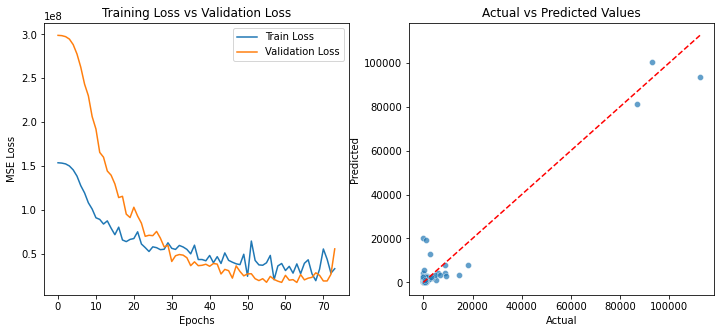

In [52]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score

# Define the CNN Model
def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=128, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),

        Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        Dropout(0.3),

        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.4),

        Dense(64, activation='relu'),
        Dense(1, activation='linear')  # Regression Output
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])
    return model

# Get input shape
input_shape = (X_train.shape[1], 1)
model = build_cnn_model(input_shape)

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=200, 
                    batch_size=32, 
                    callbacks=[early_stopping])

# Evaluate Performance
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest MAE: {test_mae:.3f}, Test Loss (MSE): {test_loss:.3f}")

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared Score
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Mean Absolute Percentage Error
smape = 100 * np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test) + 1e-8))  # SMAPE
evs = explained_variance_score(y_test, y_pred)  # Explained Variance Score

# Print all metrics
print(f"📊 Evaluation Metrics:")
print(f"✅ RMSE: {rmse:.3f}")
print(f"✅ R² Score: {r2:.3f}")
print(f"✅ MAPE: {mape:.3f}%")
print(f"✅ SMAPE: {smape:.3f}%")
print(f"✅ Explained Variance Score: {evs:.3f}")

# Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title("Training Loss vs Validation Loss")

# Plot Predictions vs Actual
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test.flatten(), y=y_pred.flatten(), alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")  # Perfect Fit Line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()


Epoch 1/200
13/13 [==============================] - 4s 51ms/step - loss: 153717952.0000 - mae: 3158.2749 - val_loss: 298989696.0000 - val_mae: 4412.3779
Epoch 2/200
13/13 [==============================] - 0s 17ms/step - loss: 153679456.0000 - mae: 3156.1538 - val_loss: 298937600.0000 - val_mae: 4411.0698
Epoch 3/200
13/13 [==============================] - 0s 15ms/step - loss: 153545296.0000 - mae: 3150.9868 - val_loss: 298784672.0000 - val_mae: 4408.1992
Epoch 4/200
13/13 [==============================] - 0s 20ms/step - loss: 153223840.0000 - mae: 3139.5054 - val_loss: 298393216.0000 - val_mae: 4399.8579
Epoch 5/200
13/13 [==============================] - 0s 15ms/step - loss: 152655824.0000 - mae: 3120.0923 - val_loss: 297653504.0000 - val_mae: 4385.6372
Epoch 6/200
13/13 [==============================] - 0s 20ms/step - loss: 151671488.0000 - mae: 3088.7515 - val_loss: 296264640.0000 - val_mae: 4361.3892
Epoch 7/200
13/13 [==============================] - 0s 15ms/step - loss: 15

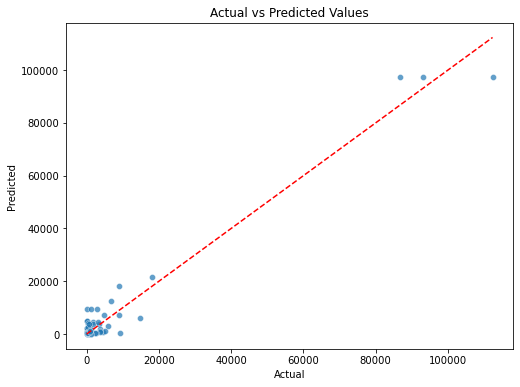

In [ ]:
import numpy as np
import tensorflow as tf
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score
from sklearn.model_selection import train_test_split

# Define CNN Model for Feature Extraction
def build_cnn_feature_extractor(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Flatten()(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.4)(x)

    outputs = Dense(64, activation='relu')(x)  # Feature Extraction Layer
    model = Model(inputs, outputs)
    
    return model

# Get input shape
input_shape = (X_train.shape[1], 1)
cnn_model = build_cnn_feature_extractor(input_shape)

# Compile and Train CNN Model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

cnn_model.fit(X_train, y_train, 
              validation_data=(X_test, y_test),
              epochs=200, 
              batch_size=32, 
              callbacks=[early_stopping],
              verbose=1)

# Extract Features from CNN
X_train_cnn_features = cnn_model.predict(X_train)
X_test_cnn_features = cnn_model.predict(X_test)

# Train XGBoost on CNN Features
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=7, 
                             subsample=0.8, colsample_bytree=0.8, random_state=42)

xgb_model.fit(X_train_cnn_features, y_train)

# Predictions
y_pred = xgb_model.predict(X_test_cnn_features)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  
smape = 100 * np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test) + 1e-8))  
evs = explained_variance_score(y_test, y_pred)  

# Print all metrics
print(f"Evaluation Metrics:")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")
print(f"MAPE: {mape:.3f}%")
print(f"SMAPE: {smape:.3f}%")
print(f"Explained Variance Score: {evs:.3f}")

# Plot Predictions vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.flatten(), y=y_pred.flatten(), alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")  # Perfect Fit Line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()
